In [1]:
#IMPORTACIONES

import pandas as pd
import numpy as np

# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings("ignore")

## FASE 1: Exploración y Limpieza

### Exploración Inicial:
- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas
relevantes.   
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de
las columnas involucradas.   
- Une los dos conjuntos de datos de la forma más eficiente.


In [2]:
#Leer csv:

flight = pd.read_csv("files/Customer Flight Activity.csv")
loyalty = pd.read_csv("files/Customer Loyalty History.csv")

In [3]:
#vemos las 10 primeras filas del primer DF
flight.head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
5,100301,2017,1,0,0,0,0,0.0,0,0
6,100364,2017,1,0,0,0,0,0.0,0,0
7,100380,2017,1,0,0,0,0,0.0,0,0
8,100428,2017,1,6,0,6,606,60.0,0,0
9,100504,2017,1,0,0,0,0,0.0,0,0


In [4]:
#vemos las 10 últimas filas del primer DF
flight.tail(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405614,999631,2018,12,11,1,12,2244,224.0,0,0
405615,999891,2018,10,0,0,0,0,0.0,0,0
405616,999758,2018,12,1,0,1,896,89.0,0,0
405617,999891,2018,11,0,0,0,0,0.0,0,0
405618,999891,2018,12,0,0,0,0,0.0,0,0
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [5]:
#vemos las 10 primeras filas del segundo DF
loyalty.head(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
5,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN
6,927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN
7,188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,12,NaN,NaN
8,852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.0,Married,Star,3861.49,Standard,2015,5,NaN,NaN
9,866307,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,100159.0,Married,Star,3861.49,Standard,2016,10,NaN,NaN


In [6]:
#vemos las 10 últimas filas del segundo DF
loyalty.tail(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16727,546773,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Married,Star,52811.49,Standard,2015,9,NaN,NaN
16728,302628,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,61718.0,Single,Star,55277.45,Standard,2013,3,NaN,NaN
16729,302460,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,88425.0,Married,Star,56675.94,Standard,2014,9,NaN,NaN
16730,672917,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,76778.0,Single,Star,58166.55,Standard,2015,1,2015.0,9.0
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [7]:
print(f"En el DataFrame final tenemos un total de {flight.shape[0]} filas y {flight.shape[1]} columnas.")
print(f"En el DataFrame final tenemos un total de {loyalty.shape[0]} filas y {loyalty.shape[1]} columnas.")

En el DataFrame final tenemos un total de 405624 filas y 10 columnas.
En el DataFrame final tenemos un total de 16737 filas y 16 columnas.


In [8]:
#vemos los duplicados en los dos DF:

print(f"En el primer DataFrame hay {flight.duplicated().sum()} duplicados")
print(f"En el segundo DataFrame hay {loyalty.duplicated().sum()} duplicados")

En el primer DataFrame hay 1864 duplicados
En el segundo DataFrame hay 0 duplicados


In [9]:
#Vamos a comprobar cómo son los suplicados que hay en el DF.

duplicates_df = flight[flight.duplicated(keep=False)] #hay que poner keep=False para que todos los valores duplicados se muestren. En este caso los necesitamos para comprobarlo
duplicates_df.head(6)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0


In [10]:
#Lo primero que vamos a hacer antes de unir ambas tablas es gestionar los duplicados:

flight.drop_duplicates(inplace=True)
flight.reset_index(drop=True)

print(f"Hay {flight.duplicated().sum()} duplicados en el DF después de realizar el .drop_duplicates")
flight.head()


Hay 0 duplicados en el DF después de realizar el .drop_duplicates


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [11]:
#Unimos las columnas para poder realizar los cambios:
df_union = loyalty.merge(flight, on =["Loyalty Number"], how = "left")
df_union.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
124383,877251,Canada,British Columbia,Vancouver,V5R 1W3,Male,High School or Below,62283.0,Married,Nova,3508.57,Standard,2013,11,NaN,NaN,2017,9,11,0,11,2233,223.0,0,0
382127,812513,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,73945.0,Single,Star,12157.33,Standard,2012,7,NaN,NaN,2018,5,0,0,0,0,0.0,0,0
234152,939238,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,91700.0,Divorced,Nova,26864.20,Standard,2017,11,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
27881,661274,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,90587.0,Married,Aurora,5408.91,Standard,2014,1,NaN,NaN,2017,2,9,2,11,2277,227.0,0,0
181061,655480,Canada,British Columbia,Whistler,V6T 1Y8,Male,College,NaN,Married,Nova,7121.08,Standard,2016,10,NaN,NaN,2017,10,0,0,0,0,0.0,0,0


In [12]:
print(f"En el DataFrame final tenemos un total de {df_union.shape[0]} filas y {df_union.shape[1]} columnas.")
print(f"Finalmente el total de duplicados en el DataFrame es de {flight.duplicated().sum()}")

En el DataFrame final tenemos un total de 403760 filas y 25 columnas.
Finalmente el total de duplicados en el DataFrame es de 0


In [13]:
#Nos muestra la cantidad de nulos en el total del DataFrame
print(f"Tenemos {df_union.isnull().sum()} nulos en el conjunto de datos.")


Tenemos Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64 nulos en el conjunto de datos

In [14]:
#Nos muestra los tipos de columnas
print(f"Los tipos de las columnas son:")
display(pd.DataFrame(df_union.dtypes, columns = ["type"]))

Los tipos de las columnas son:


,type
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object


### Limpieza de Datos:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los
datos para el análisis estadístico.

In [15]:
#poner en minúsculas las columnas:
print(f"Las columnas antes de ser cambiadas son: {list(df_union.columns)}")
df_union.columns = df_union.columns.str.lower()
print("---")
print(f"Las columnas después de ser cambiadas son: {list(df_union.columns)}")

Las columnas antes de ser cambiadas son: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']
---
Las columnas después de ser cambiadas son: ['loyalty number', 'country', 'province', 'city', 'postal code', 'gender', 'education', 'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type', 'enrollment year', 'enrollment month', 'cancellation year', 'cancellation month', 'year', 'month', 'flights booked', 'flights with companions', 'total flights', 'distance', 'points accumulated', 'points redeemed', 'dollar cost points redeemed']


In [16]:
#Cambiar los nombres de las columnas para que no existan espacios y sean reemplazados por '_'
print(f"Las columnas antes de ser cambiadas son: {list(df_union.columns)}")
df_union.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
print("---")
print(f"Las columnas después de ser cambiadas son: {list(df_union.columns)}")

Las columnas antes de ser cambiadas son: ['loyalty number', 'country', 'province', 'city', 'postal code', 'gender', 'education', 'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type', 'enrollment year', 'enrollment month', 'cancellation year', 'cancellation month', 'year', 'month', 'flights booked', 'flights with companions', 'total flights', 'distance', 'points accumulated', 'points redeemed', 'dollar cost points redeemed']
---
Las columnas después de ser cambiadas son: ['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']


In [17]:
#Cambiar algunos nombres de columnas para que esten más claros:
nuevas_columnas = {"year":"flight_year", "month":"flight_month"}
df_union = df_union.rename(columns=nuevas_columnas)
print(f"Las columnas después de ser cambiadas son: {list(df_union.columns)}")

Las columnas después de ser cambiadas son: ['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month', 'flight_year', 'flight_month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed']


In [18]:
df_union.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [19]:
#poner en minúsculas los valores del DF:

for col in df_union.columns:
        # Verificar si la columna contiene strings y convertirlos a minúsculas
        if df_union[col].dtype == 'object':
            df_union[col] = df_union[col].str.lower()

df_union.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0


In [20]:
lista_ob = ["cancellation_month"]

print(f"Antes del cambio de tipo:")
display(pd.DataFrame(df_union[["cancellation_month"]].dtypes, columns = ["type"]))
print("----")

for col in lista_ob: 
    df_union[col] = df_union[col].astype('object')

print(f"Después del cambio de tipo, las columnas quedan:")
display(pd.DataFrame(df_union[["cancellation_month"]].dtypes, columns = ["type"]))

Antes del cambio de tipo:


,type
cancellation_month,float64


----
Después del cambio de tipo, las columnas quedan:


,type
cancellation_month,object


In [21]:
#OPCIÓN A PARA LOS MESES:
#He decidido cambiar los meses por escrito para que sea más visual.
#Creamos un diccionario para los meses:
months = {
    1: 'january',
    2: 'february',
    3: 'march',
    4: 'april',
    5: 'may',
    6: 'june',
    7: 'july',
    8: 'august',
    9: 'september',
    10: 'october',
    11: 'november',
    12: 'december'
}

#Usamos la función .map para aplicarlo:
df_union['enrollment_month'] = df_union['enrollment_month'].map(months)
df_union['cancellation_month'] = df_union['cancellation_month'].map(months)
df_union['flight_month'] = df_union['flight_month'].map(months)
print("Los meses actualizados quedarían:")
print(list(df_union['enrollment_month'].unique()))
print(list(df_union['cancellation_month'].unique()))
print(list(df_union['flight_month'].unique()))
df_union[['enrollment_month','cancellation_month', 'flight_month']].sample(5)

Los meses actualizados quedarían:
['february', 'march', 'july', 'october', 'may', 'june', 'december', 'january', 'november', 'august', 'april', 'september']
[nan, 'january', 'december', 'april', 'february', 'july', 'november', 'may', 'june', 'october', 'august', 'september', 'march']
['january', 'february', 'march', 'april', 'october', 'may', 'june', 'july', 'august', 'september', 'november', 'december']


,enrollment_month,cancellation_month,flight_month
63689,january,NaN,january
352925,november,NaN,november
326734,september,NaN,october
352504,april,NaN,october
340002,may,NaN,october


In [22]:
#Cambiar a tipo de dato de las columnas que deberían ser INT:

lista_int = ["cancellation_year", "points_accumulated"]

#Manejamos los valores no numéricos:
#Reemplazamos los valores no numéricos con cero:
df_union[lista_int] = df_union[lista_int].apply(pd.to_numeric, errors='coerce').fillna(0)


print(f"Antes del cambio de tipo:")
display(pd.DataFrame(df_union[["cancellation_year", "points_accumulated"]].dtypes, columns = ["type"]))
print("----")

for col in lista_int: 
    df_union[col] = df_union[col].astype(int)

print(f"Después del cambio de tipo, las columnas quedan:")
display(pd.DataFrame(df_union[["cancellation_year", "points_accumulated"]].dtypes, columns = ["type"]))

Antes del cambio de tipo:


,type
cancellation_year,float64
points_accumulated,float64


----
Después del cambio de tipo, las columnas quedan:


,type
cancellation_year,int64
points_accumulated,int64


In [23]:
'''#OPCIÓN B PARA LOS MESES
#Dejar los números y cambiarlo a INT
#Cambiar a tipo de dato de las columnas que deberían ser INT:

lista_int = ["cancellation_year", "cancellation_month", "points_accumulated"]

#Manejamos los valores no numéricos:
#Reemplazamos los valores no numéricos con cero:
df_union[lista_int] = df_union[lista_int].apply(pd.to_numeric, errors='coerce').fillna(0)


print(f"Antes del cambio de tipo:")
display(pd.DataFrame(df_union[["cancellation_year", "cancellation_month", "points_accumulated"]].dtypes, columns = ["type"]))
print("----")

for col in lista_int: 
    df_union[col] = df_union[col].astype(int)

print(f"Después del cambio de tipo, las columnas quedan:")
display(pd.DataFrame(df_union[["cancellation_year", "cancellation_month", "points_accumulated"]].dtypes, columns = ["type"]))'''

'#OPCIÓN B PARA LOS MESES\n#Dejar los números y cambiarlo a INT\n#Cambiar a tipo de dato de las columnas que deberían ser INT:\n\nlista_int = ["cancellation_year", "cancellation_month", "points_accumulated"]\n\n#Manejamos los valores no numéricos:\n#Reemplazamos los valores no numéricos con cero:\ndf_union[lista_int] = df_union[lista_int].apply(pd.to_numeric, errors=\'coerce\').fillna(0)\n\n\nprint(f"Antes del cambio de tipo:")\ndisplay(pd.DataFrame(df_union[["cancellation_year", "cancellation_month", "points_accumulated"]].dtypes, columns = ["type"]))\nprint("----")\n\nfor col in lista_int: \n    df_union[col] = df_union[col].astype(int)\n\nprint(f"Después del cambio de tipo, las columnas quedan:")\ndisplay(pd.DataFrame(df_union[["cancellation_year", "cancellation_month", "points_accumulated"]].dtypes, columns = ["type"]))'

In [24]:
#Volvemos a comprobar los tipos:
print(f"Los tipos de las columnas son:")
display(pd.DataFrame(df_union.dtypes, columns = ["type"]))

Los tipos de las columnas son:


,type
loyalty_number,int64
country,object
province,object
city,object
postal_code,object
gender,object
education,object
salary,float64
marital_status,object
loyalty_card,object


In [25]:
#Vamos a ver los nulos. Sacamos el porcentaje de nulos de catada columna: 

df_nulos = pd.DataFrame((df_union.isnull().sum() / df_union.shape[0]) * 100, columns = ["%_nulos"])

df_nulos[df_nulos["%_nulos"] > 0]

#podemos observar en el output que sólo hay dos columnas con nulos: salary y cancellation_month

,%_nulos
salary,25.326927
cancellation_month,87.703091


In [26]:
#Al analizar de DF observamos que hay muchos valores 0. Vamos a comprobar antes de que no se trate de nulos:
#Vamos a sacar las columnas numéricas para comprobarlo:

columnas_numericas = df_union.select_dtypes(include=np.number)
columnas_numericas.head()


,loyalty_number,salary,clv,enrollment_year,cancellation_year,flight_year,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,83236.0,3839.14,2016,0,2017,0,0,0,0,0,0,0
1,480934,83236.0,3839.14,2016,0,2017,3,0,3,2823,282,0,0
2,480934,83236.0,3839.14,2016,0,2017,0,0,0,0,0,0,0
3,480934,83236.0,3839.14,2016,0,2017,0,0,0,0,0,0,0
4,480934,83236.0,3839.14,2016,0,2018,6,2,8,3352,335,465,38


In [27]:
#Vamos a ver cuál es el número de ceros en cada una de las columnas.
#Primero vamos a recordar el número de filas total:

print(f"El número de filas del DataFrame es {df_union.shape[0]}")
print("----")

# Contar los ceros en cada columna numérica
ceros_columnas = (columnas_numericas == 0).sum()
print(ceros_columnas)
print("----")

#El porcentaje sería:
porcentaje_ceros = (ceros_columnas / len(df_union)) * 100
porcentaje_ceros

El número de filas del DataFrame es 403760
----
loyalty_number                      0
salary                              0
clv                                 0
enrollment_year                     0
cancellation_year              354110
flight_year                         0
flights_booked                 196128
flights_with_companions        295023
total_flights                  196128
distance                       196128
points_accumulated             196128
points_redeemed                379579
dollar_cost_points_redeemed    379579
dtype: int64
----


loyalty_number                  0.000000
salary                          0.000000
clv                             0.000000
enrollment_year                 0.000000
cancellation_year              87.703091
flight_year                     0.000000
flights_booked                 48.575391
flights_with_companions        73.068902
total_flights                  48.575391
distance                       48.575391
points_accumulated             48.575391
points_redeemed                94.011046
dollar_cost_points_redeemed    94.011046
dtype: float64

In [28]:
for col in columnas_numericas:
    print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
    display(pd.DataFrame(df_union[col].value_counts()).head())
    print("----")

#Es muy probable que los 0 no sean nulos, por lo tanto los asimilamos como dato numérico. 
#Aún así lo tendremos en cuenta a la hora de realizar el análisis

La columna LOYALTY_NUMBER tiene las siguientes valores únicos:


,loyalty_number
890702,48
617489,48
974875,48
736504,48
713132,47


----
La columna SALARY tiene las siguientes valores únicos:


,salary
101933.0,552
61809.0,336
62283.0,336
51573.0,336
64001.0,312


----
La columna CLV tiene las siguientes valores únicos:


,clv
8564.77,312
14024.36,311
4330.39,309
3873.65,308
25464.82,305


----
La columna ENROLLMENT_YEAR tiene las siguientes valores únicos:


,enrollment_year
2018,72401
2017,60038
2016,59294
2013,57796
2014,57067


----
La columna CANCELLATION_YEAR tiene las siguientes valores únicos:


,cancellation_year
0,354110
2018,15519
2017,12147
2016,10248
2015,6360


----
La columna FLIGHT_YEAR tiene las siguientes valores únicos:


,flight_year
2018,202022
2017,201738


----
La columna FLIGHTS_BOOKED tiene las siguientes valores únicos:


,flights_booked
0,196128
3,18228
11,15705
5,15084
7,14561


----
La columna FLIGHTS_WITH_COMPANIONS tiene las siguientes valores únicos:


,flights_with_companions
0,295023
2,19272
3,19015
1,17905
4,13665


----
La columna TOTAL_FLIGHTS tiene las siguientes valores únicos:


,total_flights
0,196128
6,15273
10,14393
8,14056
4,13656


----
La columna DISTANCE tiene las siguientes valores únicos:


,distance
0,196128
2520,410
2880,401
1680,389
2160,365


----
La columna POINTS_ACCUMULATED tiene las siguientes valores únicos:


,points_accumulated
0,196128
180,793
288,781
252,779
226,774


----
La columna POINTS_REDEEMED tiene las siguientes valores únicos:


,points_redeemed
0,379579
447,103
523,100
443,98
516,97


----
La columna DOLLAR_COST_POINTS_REDEEMED tiene las siguientes valores únicos:


,dollar_cost_points_redeemed
0,379579
36,1037
38,1001
40,993
42,983


----


In [29]:
#La gestión de los nulos: Analizar salario y cancellation_month 'unknown'
# Rellenar los valores nulos en la columna 'mi_columna' con 'unknown'
df_union['cancellation_month'] = df_union['cancellation_month'].fillna('unknown')

print(f"El total de nulos de la columna cancellation_month despues de .fillna es: {df_union['cancellation_month'].isna().sum()}")

El total de nulos de la columna cancellation_month despues de .fillna es: 0


In [30]:
#Nos muestra los valores de las columnas categóricas
print("Los valores que tenemos para las COLUMNAS CATEGÓRICAS son: \n")
dataframe_categoricas = df_union.select_dtypes(include = "O")

for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
        display(pd.DataFrame(df_union[col].value_counts()).head())
        print("----")

Los valores que tenemos para las COLUMNAS CATEGÓRICAS son: 

La columna COUNTRY tiene las siguientes valores únicos:


,country
canada,403760


----
La columna PROVINCE tiene las siguientes valores únicos:


,province
ontario,130258
british columbia,106442
quebec,79573
alberta,23360
manitoba,15900


----
La columna CITY tiene las siguientes valores únicos:


,city
toronto,80775
vancouver,62314
montreal,49687
winnipeg,15900
whistler,13994


----
La columna POSTAL_CODE tiene las siguientes valores únicos:


,postal_code
v6e 3d9,21944
v5r 1w3,16529
v6t 1y8,13994
v6e 3z3,13128
m2m 7k8,12855


----
La columna GENDER tiene las siguientes valores únicos:


,gender
female,202757
male,201003


----
La columna EDUCATION tiene las siguientes valores únicos:


,education
bachelor,252567
college,102260
high school or below,18915
doctor,17731
master,12287


----
La columna MARITAL_STATUS tiene las siguientes valores únicos:


,marital_status
married,234845
single,108153
divorced,60762


----
La columna LOYALTY_CARD tiene las siguientes valores únicos:


,loyalty_card
star,183745
nova,136883
aurora,83132


----
La columna ENROLLMENT_TYPE tiene las siguientes valores únicos:


,enrollment_type
standard,380419
2018 promotion,23341


----
La columna ENROLLMENT_MONTH tiene las siguientes valores únicos:


,enrollment_month
may,36314
december,35635
july,35544
november,34867
october,34817


----
La columna CANCELLATION_MONTH tiene las siguientes valores únicos:


,cancellation_month
unknown,354110
december,5112
november,5095
august,4992
july,4480


----
La columna FLIGHT_MONTH tiene las siguientes valores únicos:


,flight_month
november,33663
october,33662
december,33662
september,33659
august,33655


----


In [31]:
for col in dataframe_categoricas:
        print(f"Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el {col.upper()} son: ")
        display(df_union[[col]].describe().T)
        print("\n ----- \n")

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el COUNTRY son: 


,count,unique,top,freq
country,403760,1,canada,403760



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el PROVINCE son: 


,count,unique,top,freq
province,403760,11,ontario,130258



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el CITY son: 


,count,unique,top,freq
city,403760,29,toronto,80775



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el POSTAL_CODE son: 


,count,unique,top,freq
postal_code,403760,55,v6e 3d9,21944



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el GENDER son: 


,count,unique,top,freq
gender,403760,2,female,202757



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el EDUCATION son: 


,count,unique,top,freq
education,403760,5,bachelor,252567



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el MARITAL_STATUS son: 


,count,unique,top,freq
marital_status,403760,3,married,234845



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el LOYALTY_CARD son: 


,count,unique,top,freq
loyalty_card,403760,3,star,183745



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el ENROLLMENT_TYPE son: 


,count,unique,top,freq
enrollment_type,403760,2,standard,380419



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el ENROLLMENT_MONTH son: 


,count,unique,top,freq
enrollment_month,403760,12,may,36314



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el CANCELLATION_MONTH son: 


,count,unique,top,freq
cancellation_month,403760,13,unknown,354110



 ----- 

Los principales estadísticos de las COLUMNAS CATEGÓRICAS para el FLIGHT_MONTH son: 


,count,unique,top,freq
flight_month,403760,12,november,33663



 ----- 



In [32]:
#Columnas númericas
for col in columnas_numericas:
        print("\n ----- \n")
        print(f"Los principales estadísticos de las COLUMNAS NUMÉRICAS para el {col.upper()} son: ")
        display(df_union[[col]].describe().T)


 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el LOYALTY_NUMBER son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el SALARY son: 


,count,mean,std,min,25%,50%,75%,max
salary,301500.0,79258.576285,34983.929798,-58486.0,59262.0,73479.0,88606.0,407228.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el CLV son: 


,count,mean,std,min,25%,50%,75%,max
clv,403760.0,7990.864857,6863.31716,1898.01,3981.78,5776.34,8937.12,83325.38



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el ENROLLMENT_YEAR son: 


,count,mean,std,min,25%,50%,75%,max
enrollment_year,403760.0,2015.250716,1.979427,2012.0,2014.0,2015.0,2017.0,2018.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el CANCELLATION_YEAR son: 


,count,mean,std,min,25%,50%,75%,max
cancellation_year,403760.0,247.967706,662.224505,0.0,0.0,0.0,0.0,2018.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el FLIGHT_YEAR son: 


,count,mean,std,min,25%,50%,75%,max
flight_year,403760.0,2017.500352,0.5,2017.0,2017.0,2018.0,2018.0,2018.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el FLIGHTS_BOOKED son: 


,count,mean,std,min,25%,50%,75%,max
flights_booked,403760.0,4.13405,5.230064,0.0,0.0,1.0,8.0,21.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el FLIGHTS_WITH_COMPANIONS son: 


,count,mean,std,min,25%,50%,75%,max
flights_with_companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el TOTAL_FLIGHTS son: 


,count,mean,std,min,25%,50%,75%,max
total_flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el DISTANCE son: 


,count,mean,std,min,25%,50%,75%,max
distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el POINTS_ACCUMULATED son: 


,count,mean,std,min,25%,50%,75%,max
points_accumulated,403760.0,124.237924,146.675448,0.0,0.0,53.0,240.0,676.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el POINTS_REDEEMED son: 


,count,mean,std,min,25%,50%,75%,max
points_redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0



 ----- 

Los principales estadísticos de las COLUMNAS NUMÉRICAS para el DOLLAR_COST_POINTS_REDEEMED son: 


,count,mean,std,min,25%,50%,75%,max
dollar_cost_points_redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [33]:
#Nos queda por gestionar los nulos de SALARY.
#Vamos a ver sus estadísticos con más detenimiento

df_union["salary"].describe().reset_index()


,index,salary
0,count,301500.000000
1,mean,79258.576285
2,std,34983.929798
3,min,-58486.000000
4,25%,59262.000000
5,50%,73479.000000
6,75%,88606.000000
7,max,407228.000000


In [34]:
#Lo que nos interesa es la media y la mediana en este caso:
df_union["salary"].describe()[["mean", "50%"]].reset_index()

#Son similares pero aún así hay diferencia entre ellos. Vamos a probar con KNN

,index,salary
0,mean,79258.576285
1,50%,73479.000000


In [41]:
# Vamos a usar el IterativeImputer

imputer_iterative = IterativeImputer(max_iter=20, random_state=42)

# Ajustamos y transformamos los datos
# IterativeImputer espera un DataFrame o una matriz bidimensional, no una Serie
# Por lo tanto, debemos proporcionar df_union[['salary']] en lugar de df_union['salary']
imputer_iterative_imputado = imputer_iterative.fit_transform(df_union[["salary"]])

# Mostramos el resultado
imputer_iterative_imputado

array([[83236.],
       [83236.],
       [83236.],
       ...,
       [75049.],
       [75049.],
       [75049.]])

In [43]:
df_union["salary_iterative"] = imputer_iterative_imputado

# Comprobamos los valores nulos en la columna "salary" después de la imputación
print(f"Después de la imputación iterativa, tenemos:\n{df_union['salary_iterative'].isnull().sum()} valores nulos")

Después de la imputación iterativa, tenemos:
0 valores nulos


In [48]:
imputer_knn = KNNImputer(n_neighbors=3)  

# Ajustamos y transformamos los datos
# KNNImputer espera un DataFrame o una matriz bidimensional, no una Serie
# Por lo tanto, debemos proporcionar df_union[['salary']] en lugar de df_union['salary']
imputer_knn_imputado = imputer_knn.fit_transform(df_union[["salary"]])

# Mostramos el resultado
imputer_knn_imputado

array([[83236.],
       [83236.],
       [83236.],
       ...,
       [75049.],
       [75049.],
       [75049.]])

In [49]:
df_union["salary_knn"] = imputer_knn_imputado

# Comprobamos los valores nulos en la columna "salary" después de la imputación
print(f"Después de la imputación KNN, tenemos:\n{df_union['salary_knn'].isnull().sum()} valores nulos")

Después de la imputación KNN, tenemos:
0 valores nulos


In [50]:
df_union[["salary", "salary_iterative", "salary_knn"]].describe()

,salary,salary_iterative,salary_knn
count,301500.000000,403760.000000,403760.000000
mean,79258.576285,79258.576285,79258.576285
std,34983.929798,30230.854484,30230.854484
min,-58486.000000,-58486.000000,-58486.000000
25%,59262.000000,63901.000000,63901.000000
50%,73479.000000,79258.576285,79258.576285
75%,88606.000000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


In [51]:
#Como podemos comprobar arriba no hay mucha diferencia entre el KNN y el Iterative. Así que no hay problema en escoger cualquiera de los dos. 
#Primero eliminamos las dos columnas sobrantes. Vamos a escoger el Iterative en este caso.

df_union.drop(["salary", "salary_knn"], axis = 1, inplace = True)

#Cambiamos el nombre de la columna que ha quedado para que mantenga el nombre de origen
df_union.rename(columns={'salary_iterative': 'salary'}, inplace = True)

#vemos el nombre de las columnas:
df_union.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'marital_status', 'loyalty_card', 'clv',
       'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'flight_year',
       'flight_month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'salary'],
      dtype='object')

In [52]:
#Guardamos el DF limpio a csv para poder tarbajar con él.

df_union.to_csv("files/customer.csv")

# Fase 2: Visualización

In [53]:
df = pd.read_csv("files/customer.csv")

In [353]:
#Establecemos un estilo de fondo para todas las gráficas, para que estéticamente quede mejor

sns.set_style("darkgrid")


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

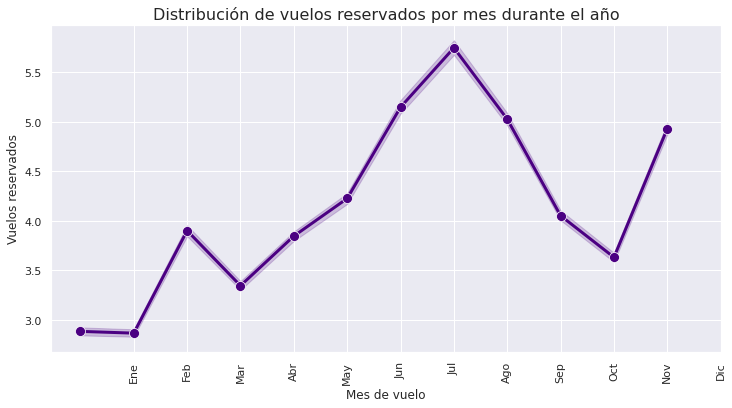

In [358]:
# Definimos el tamaño de la figura lo primero de todo
plt.figure(figsize=(12, 6))

# Realizamos un lineplot para mostrar la relación entre las variables mes de vuelo y vuelos reservados. El lineplot se utiliza para la relación entre dos variales continuas a lo largo de un eje, generalmente el tiempo.

sns.lineplot(x="flight_month", y="flights_booked",
            data=df, 
            color="indigo",
            marker="o",
            markersize=10,
            linewidth=3)

# Título del gráfico
plt.title('Distribución de vuelos reservados por mes durante el año', fontsize=16)

# Etiquetas personalizadas para el eje x
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Establecer las etiquetas y la rotación del eje x
plt.xticks(range(1, 13), meses, rotation=90)

# Nombre del eje x
plt.xlabel("Mes de vuelo", fontsize=12)

# Nombre del eje y
plt.ylabel("Vuelos reservados", fontsize=12);

*Según podemos ver con la gráfica, los vuelos que se reservan por cada mes tienen son más en la temporada de verano. Aunque tiene una subida en el mes de febrero, en marzo vuelve a bajar para continuar la escalada de reservas ahta llegar a su pico en el mes de julio. Vuelven a crecer las reservas a partir de octubre, hacia el mes de noviembre.*

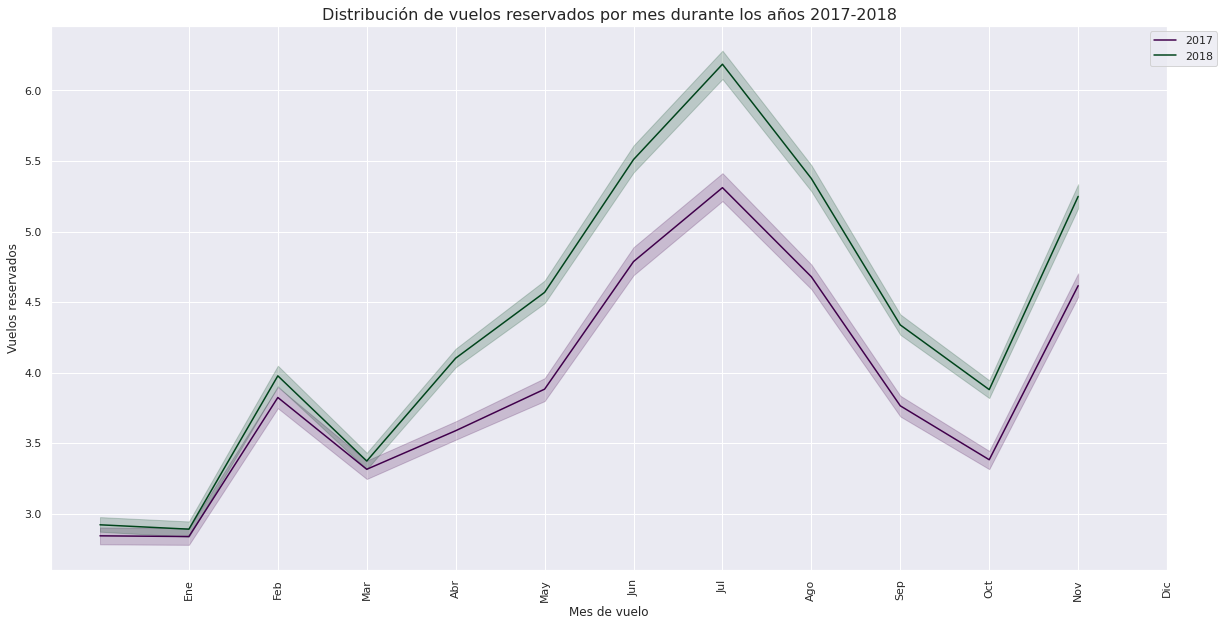

In [357]:
#Gráfica para ver por años:

plt.figure(figsize=(20, 10))
sns.lineplot(x="flight_month", y="flights_booked",
            data=df,  
            hue = "flight_year",
            palette="PRGn")


plt.title("Distribución de vuelos reservados por mes durante los años 2017-2018", fontsize=16)

meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']            
plt.legend(bbox_to_anchor=(1.05, 1))

plt.xticks(range(1, 13), meses, rotation=90)

plt.xlabel("Mes de vuelo", fontsize=12)

plt.ylabel("Vuelos reservados", fontsize=12);

*En esta segunda gráfica podemos ver que hya poca variación con la explicación anterior, ambos años siguen la msima tendencia de alza de reservas durante los meses de verano y las mismas bajas en los mismos meses. Lo que sí podemos comprobar es que en el año 2018 hay un aumento de las reservas en comparación con el año anterior.*

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

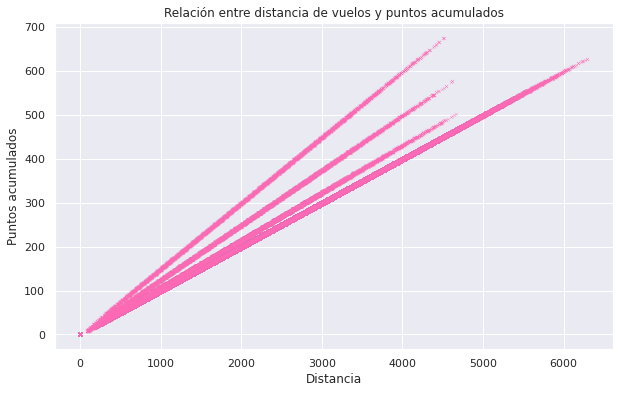

In [362]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="distance", 
                y="points_accumulated", 
                data=df,
                color="hotpink",
                s = 10, 
                marker = "x")

plt.title('Relación entre distancia de vuelos y puntos acumulados')
plt.xlabel("Distancia", fontsize=12)

plt.ylabel("Puntos acumulados", fontsize=12);


In [328]:
df_union.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,flight_year,flight_month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016,february,0,unknown,2017,january,0,0,0,0,0,0,0
1,480934,canada,ontario,toronto,m2z 4k1,female,bachelor,83236.0,married,star,3839.14,standard,2016,february,0,unknown,2017,february,3,0,3,2823,282,0,0


In [356]:
df_union.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'flight_year',
       'flight_month', 'flights_booked', 'flights_with_companions',
       'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')